In [6]:
from environment import GridWorld
from agent import QLearner, RandomAgent

In [2]:
import random
random.seed()

In [3]:
def simulate_grid_world(agent, task, t):
    state = task.get_state()
    while not task.isTerminalState(state):
        t += 1
        action = agent.action_selection(state, t)
        reward, state = task.respond_to_action(action)
        agent.update(state, reward, t)
    return t

import numpy as np

num_simulations = 30
num_episodes = 70 # 150 was good
rewards = np.zeros((num_simulations, num_episodes))

discount_rate = lambda _: 0.9
learning_rate = lambda _: 0.1
# exploration_rate = lambda _: 0.25
exploration_rate = lambda t: 1/t

for sim in range(num_simulations):
    t = 0
    task = GridWorld(4, start_state = (3,0), terminal_states=[(0,0), (3,3)])
    agent = QLearner(task, exploration_rate, learning_rate, discount_rate)
    state = task.get_state()
    for ep in range(num_episodes):
        t = simulate_grid_world(agent, task, t)
        rewards[sim][ep] = agent.accumulated_reward
        agent.accumulated_reward = 0
        task.reset_state()

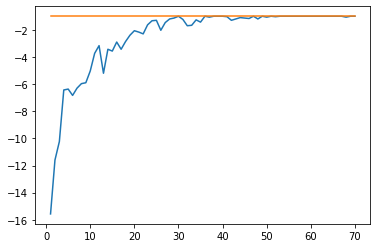

In [4]:
average = np.average(rewards, axis = 0)
import matplotlib.pyplot as plt
plt.plot(range(1, num_episodes + 1), average)
plt.plot(range(1, num_episodes + 1), np.repeat(-1, num_episodes))

In [7]:
for sim in range(num_simulations):
    t = 0
    task = GridWorld(4, start_state = (3,0), terminal_states=[(0,0), (3,3)])
    agent = RandomAgent(task)
    state = task.get_state()
    for ep in range(num_episodes):
        t = simulate_grid_world(agent, task, t)
        rewards[sim][ep] = agent.accumulated_reward
        agent.accumulated_reward = 0
        task.reset_state()

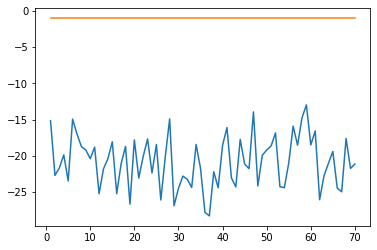

In [8]:
average = np.average(rewards, axis = 0)
import matplotlib.pyplot as plt
plt.plot(range(1, num_episodes + 1), average)
plt.plot(range(1, num_episodes + 1), np.repeat(-1, num_episodes))